In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from models import ModelTemplate, LightningWrapper, ExampleCNN, ExampleMlp
from torch.utils.data import DataLoader
from tqdm import tqdm
from data_loading import PokemonDataset
import os
from lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger, CSVLogger
from torch import nn
import torch

CORES = 4 #os.cpu_count()

In [12]:
def test_loading(loader):
    for _ in tqdm(loader):
        pass

    for i in loader:
        for a in i:
            print(a.shape, a.dtype)
        return


train_dataset = PokemonDataset("train",)
val_dataset = PokemonDataset("val",)
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=CORES)
val_loader  = DataLoader(val_dataset, batch_size=64, num_workers=CORES)
test_loader = DataLoader(PokemonDataset("test",), batch_size=64, num_workers=CORES)

# test_loading(train_loader)
# test_loading(val_loader)
# test_loading(test_loader)

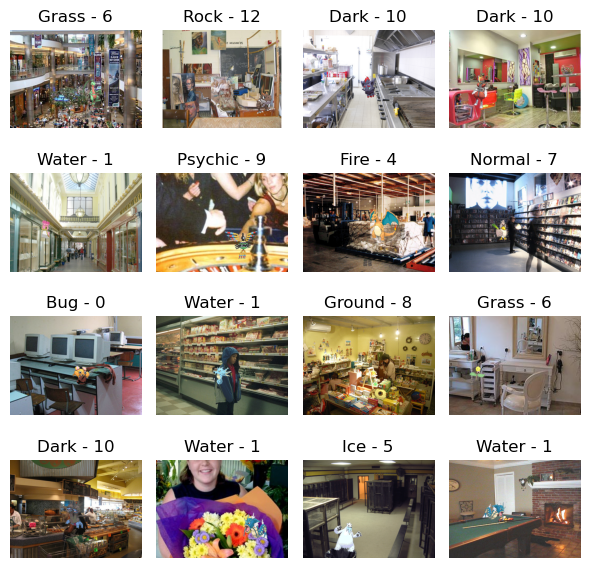

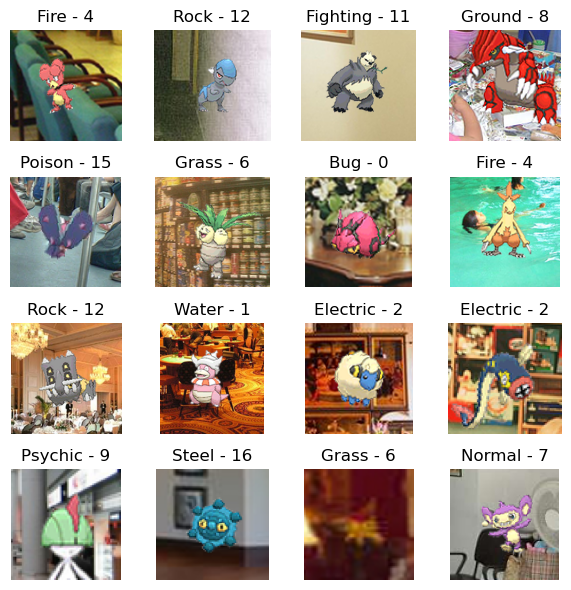

In [8]:
train_dataset.plot_examples()
train_dataset.plot_examples_crops()

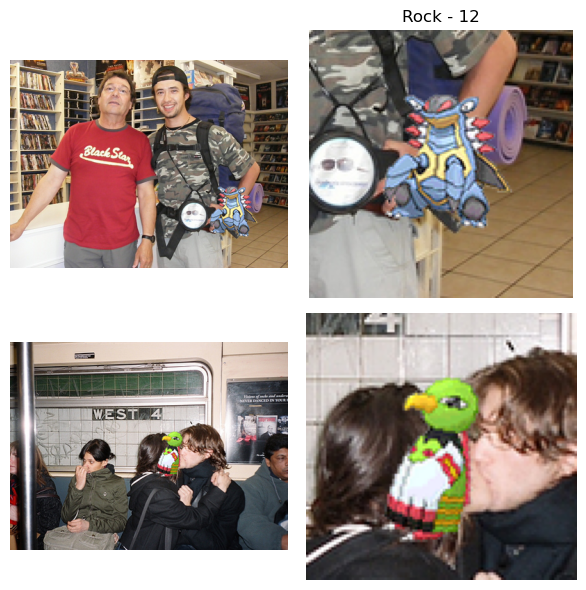

In [9]:
train_dataset.plot_examples_both()


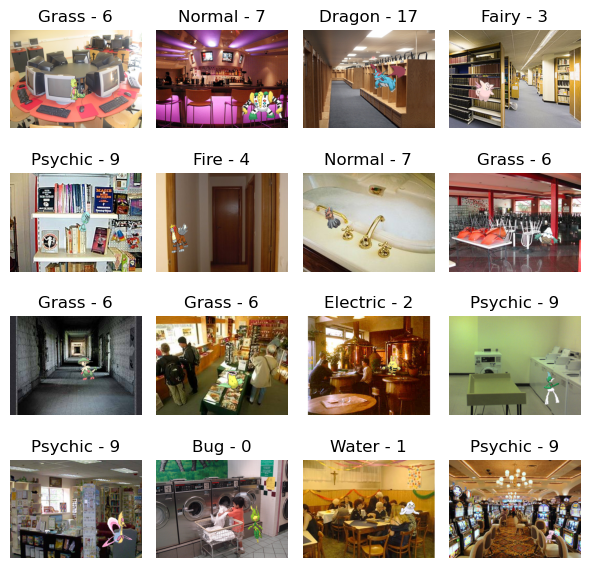

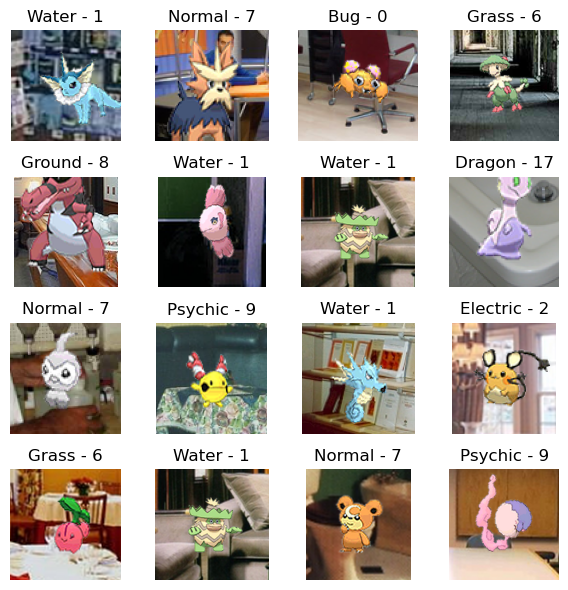

In [13]:
val_dataset.plot_examples()
val_dataset.plot_examples_crops()

In [10]:
model = ExampleMlp(True, train_dataset.num_classes, imgsz=256)
wrapper = LightningWrapper(model)
trainer = Trainer()
trainer.fit(wrapper, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.

  | Name        | Type             | Params
-------------------------------------------------
0 | mo

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [28]:
model = ExampleCNN(True, train_dataset.num_classes, 256)
wrapper = LightningWrapper(model)
trainer = Trainer()
trainer.fit(wrapper, train_loader, val_loader)